<a href="https://colab.research.google.com/github/FATEMA-MITU-11/edge-project/blob/main/edge_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: create a csv file with Student Name, Student ID
# ○ Subject, Score, Attendance Percentage
# ○ Assignment Completion (Yes/No)

import csv

data = [
    ['Student Name', 'Student ID', 'Subject', 'Score', 'Attendance Percentage', 'Assignment Completion'],
]

with open('students_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)


In [2]:

import csv

def input_data():
    student_name = input("Enter Student Name: ")
    student_id = input("Enter Student ID: ")
    subject = input("Enter Subject: ")
    score = input("Enter Score: ")
    attendance = input("Enter Attendance Percentage: ")
    assignment_completion = input("Enter Assignment Completion (Yes/No): ")

    data = [student_name, student_id, subject, score, attendance, assignment_completion]

    with open('students_data.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(data)

input_data()

Enter Student Name: TUHI
Enter Student ID: 67
Enter Subject: COMPUTING
Enter Score: 33
Enter Attendance Percentage: 30
Enter Assignment Completion (Yes/No): NO


In [4]:
# prompt: Use File Handling to:
# ○ Read the CSV file.
# ○ Write modified or updated data back to a new CSV file.

import csv

def modify_data():
    # Read existing data
    data = []
    try:
        with open('students_data.csv', 'r', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                data.append(row)
    except FileNotFoundError:
        print("Error: 'students_data.csv' not found.")
        return

    # Modify data (Example: Update Score for a specific student)
    student_id_to_update = input("Enter Student ID to update score: ")
    new_score = input("Enter new score: ")
    for row in data:
        if len(row) > 1 and row[1] == student_id_to_update:  # Check for valid row and ID
            row[3] = new_score
            print(f"Updated score for Student ID {student_id_to_update}")
            break
    else:
        print(f"Student ID {student_id_to_update} not found.")

    # Write updated data to a new CSV file
    with open('modified_students_data.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)


modify_data()

Enter Student ID to update score: 2435
Enter new score: 59
Updated score for Student ID 2435


In [12]:
# prompt: Pandas and DataFrames:
# ○ Analyze average, minimum, and maximum scores per student.
# ○ Identify students with attendance < 75% or missing assignments.

import pandas as pd

def analyze_student_data(filepath):
    try:
        df = pd.read_csv(filepath)

        # Analyze average, minimum, and maximum scores per student
        score_summary = df.groupby('Student Name')['Score'].agg(['mean', 'min', 'max'])
        print("Score Summary per Student:\n", score_summary)

        # Identify students with attendance < 75% or missing assignments
        df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
        low_attendance = df[(df['Attendance Percentage'] < 75) | (df['Assignment Completion'] == 'No')]
        print("\nStudents with low attendance or missing assignments:\n", low_attendance)

    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the CSV file. Please ensure the CSV has the correct header.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filepath}' is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Example usage with 'students_data.csv' and 'modified_students_data.csv'
analyze_student_data('students_data.csv')
analyze_student_data('modified_students_data.csv')

Score Summary per Student:
               mean  min  max
Student Name                
anonna        40.0   40   40
meem          67.0   67   67
mitu          75.0   70   80

Students with low attendance or missing assignments:
   Student Name Student ID        Subject  Score  Attendance Percentage  \
3         mitu    stu-345  real analysis     70                     70   

  Assignment Completion  
3                    no  
Score Summary per Student:
               mean  min  max
Student Name                
anonna        78.0   78   78
meem          67.0   67   67
mitu          75.0   70   80

Students with low attendance or missing assignments:
   Student Name Student ID        Subject  Score  Attendance Percentage  \
3         mitu    stu-345  real analysis     70                     70   

  Assignment Completion  
3                    no  


In [23]:
import pandas as pd

def filter_failing_students():
    # Hardcoded values for file name, subject, and passing score
    file_name = "students_data.csv"
    subject = "math"
    passing_score = 85

    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_name)

        # Ensure 'Score' column is numeric, coercing errors to NaN
        df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

        # Filter students failing the specific subject
        failing_students = df[(df['Subject'] == subject) & (df['Score'] < passing_score)]

        # Display the results
        if not failing_students.empty:
            print(f"\nStudents failing {subject} (below {passing_score}):\n", failing_students)
        else:
            print(f"\nNo students found failing {subject} (below {passing_score}).")

    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the CSV file. Please ensure the CSV has the correct header.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_name}' is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Call the function to filter students failing math with a score below 85
filter_failing_students()



Students failing math (below 85):
   Student Name Student ID Subject  Score  Attendance Percentage  \
1       anonna       2435    math     40                     80   

  Assignment Completion  
1                    no  


In [7]:
# prompt:  Data Type Conversion  :
# ○  Convert  Score  to integer if stored as a string.

def input_data():
    student_name = input("Enter Student Name: ")
    student_id = input("Enter Student ID: ")
    subject = input("Enter Subject: ")
    Score = input("Enter Score: ")
    try:
        score = int(Score) # Convert score to integer
    except ValueError:
        print("Invalid score. Please enter an integer.")
        return
    attendance = input("Enter Attendance Percentage: ")
    assignment_completion = input("Enter Assignment Completion (Yes/No): ")

    data = [student_name, student_id, subject, Score, attendance, assignment_completion]

    with open('students_data.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(data)

In [1]:
import pandas as pd

# Load the CSV file
file_name = "students_data.csv"

# Read the file into a DataFrame
try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"File {file_name} not found!")
    exit()

# Ensure there is a 'score' column
if "Score" not in data.columns:
    print("The 'score' column is missing from the dataset!")
    exit()

# Function to convert score values to integers if they are strings
def convert_score(value):
    try:
        # Convert to integer if it's a string representation of a number
        return int(value)
    except (ValueError, TypeError):
        # Return the original value if conversion is not possible
        return value

# Apply the function to the 'score' column
data["Score"] = data["Score"].apply(convert_score)

# Check for any non-integer values remaining in the 'score' column
non_integer_values = data["Score"].apply(lambda x: not isinstance(x, int)).sum()

if non_integer_values > 0:
    print(f"Warning: There are {non_integer_values} non-integer values in the 'score' column after processing.")

# Save the processed data to a new file
output_file_name = "students_data.csv"
data.to_csv(output_file_name, index=False)

print(f"Processing complete. The updated data has been saved to {output_file_name}.")


Processing complete. The updated data has been saved to students_data.csv.


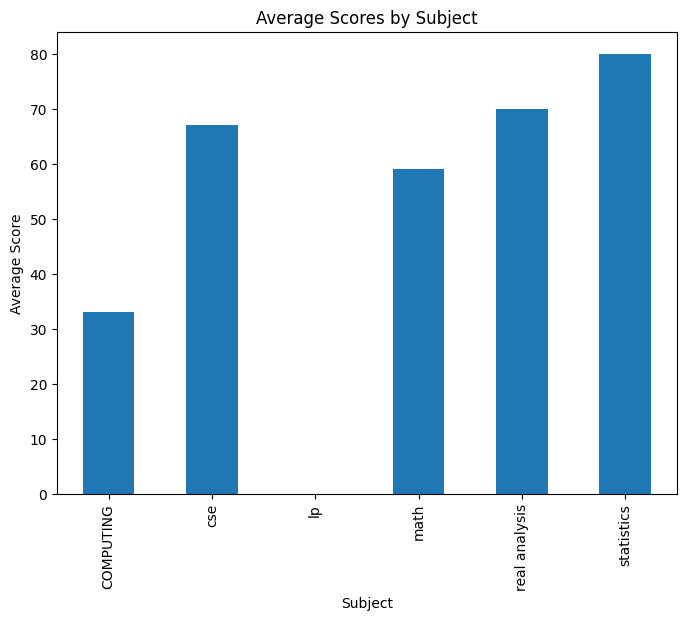

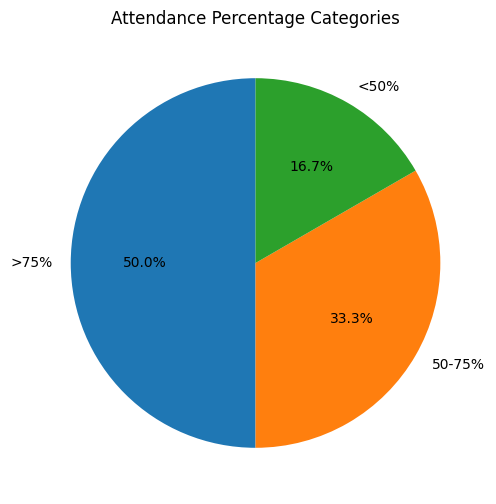

Error: 'Date' column not found in the DataFrame. Cannot create the line graph.


In [5]:
# prompt: Use  Matplotlib  or  Pandas Visualization  to:
# ○  Plot a bar chart of average scores by subject.
# ○  Display a pie chart of attendance percentage categories (e.g., <50%, 50-75%,
# >75%).
# ○  Create a line graph showing performance trends over time for a selected student.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data (replace 'modified_students_data.csv' with your actual file)
try:
    df = pd.read_csv('modified_students_data.csv')
    # Convert 'Score' and 'Attendance Percentage' to numeric, handling errors
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
except FileNotFoundError:
    print("Error: 'modified_students_data.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: 'modified_students_data.csv' is empty.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()


# 1. Bar chart of average scores by subject
average_scores = df.groupby('Subject')['Score'].mean()
plt.figure(figsize=(8, 6))
average_scores.plot(kind='bar')
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

# 2. Pie chart of attendance percentage categories
attendance_bins = [0, 50, 75, 100]
attendance_labels = ['<50%', '50-75%', '>75%']
df['Attendance Category'] = pd.cut(df['Attendance Percentage'], bins=attendance_bins, labels=attendance_labels, right=False)
attendance_counts = df['Attendance Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attendance Percentage Categories')
plt.show()


# 3. Line graph showing performance trends over time (assuming a 'Date' column exists)
# If there's no date, you'll need to add one or use another identifier for time.
if 'Date' in df.columns:
  student_name = input("Enter the student name to display performance trends: ")

  student_data = df[df['Student Name'] == student_name]
  if not student_data.empty:
      plt.figure(figsize=(10, 6))
      plt.plot(student_data['Date'], student_data['Score'])
      plt.xlabel('Date')
      plt.ylabel('Score')
      plt.title(f"Performance Trend for {student_name}")
      plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
      plt.tight_layout()  # Adjust layout to prevent labels from overlapping
      plt.show()
  else:
      print(f"No data found for student: {student_name}")
else:
    print("Error: 'Date' column not found in the DataFrame. Cannot create the line graph.")

In [6]:
# prompt: Applying Functions and Logic
# ●  Implement  Functions  for:
# ○  Calculating aggregate scores for each student.
# ○  Determining grade (A/B/C/Fail) based on scoring criteria.
# ○  Generating student performance reports in a user-friendly format.

def calculate_aggregate_score(df):
    # Assuming 'Score', 'Attendance Percentage', and 'Assignment Completion' columns exist
    # and 'Assignment Completion' is 'Yes' or 'No'.  Adjust as needed for your data.
    df['Assignment Points'] = df['Assignment Completion'].apply(lambda x: 10 if x == 'Yes' else 0)
    df['Aggregate Score'] = 0.6 * df['Score'] + 0.3 * df['Attendance Percentage'] + 0.1 * df['Assignment Points']
    return df

def determine_grade(aggregate_score):
    if aggregate_score >= 90:
        return 'A'
    elif aggregate_score >= 80:
        return 'B'
    elif aggregate_score >= 70:
        return 'C'
    else:
        return 'Fail'

def generate_student_report(df):
    df = calculate_aggregate_score(df)
    df['Grade'] = df['Aggregate Score'].apply(determine_grade)

    # Generate report
    for index, row in df.iterrows():
        print("-" * 30)
        print(f"Student Name: {row['Student Name']}")
        print(f"Student ID: {row['Student ID']}")
        print(f"Subject: {row['Subject']}")
        print(f"Score: {row['Score']}")
        print(f"Attendance Percentage: {row['Attendance Percentage']}%")
        print(f"Assignment Completion: {row['Assignment Completion']}")
        print(f"Aggregate Score: {row['Aggregate Score']:.2f}")
        print(f"Grade: {row['Grade']}")
        print("-" * 30)

# Example usage: Assuming 'df' is your DataFrame from the previous code
# Load the data (replace 'modified_students_data.csv' with your actual file)
try:
    df = pd.read_csv('modified_students_data.csv')
    # Convert 'Score' and 'Attendance Percentage' to numeric, handling errors
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
except FileNotFoundError:
    print("Error: 'modified_students_data.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: 'modified_students_data.csv' is empty.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()


generate_student_report(df)

------------------------------
Student Name: mitu
Student ID: stu-345
Subject: statistics
Score: 80.0
Attendance Percentage: 89%
Assignment Completion: yes
Aggregate Score: 74.70
Grade: C
------------------------------
------------------------------
Student Name: anonna
Student ID: 2435
Subject: math
Score: 59.0
Attendance Percentage: 80%
Assignment Completion: no
Aggregate Score: 59.40
Grade: Fail
------------------------------
------------------------------
Student Name: meem
Student ID: stu-4565
Subject: cse
Score: 67.0
Attendance Percentage: 89%
Assignment Completion: yes
Aggregate Score: 66.90
Grade: Fail
------------------------------
------------------------------
Student Name: mitu
Student ID: stu-345
Subject: real analysis
Score: 70.0
Attendance Percentage: 70%
Assignment Completion: no
Aggregate Score: 63.00
Grade: Fail
------------------------------
------------------------------
Student Name: monami
Student ID: 34
Subject: lp
Score: nan
Attendance Percentage: 67%
Assignment

In [8]:
# prompt: Applying Functions and Logic
# ●  Implement  Functions  for:
# ○  Calculating aggregate scores for each student.
# ○  Determining grade (A/B/C/Fail) based on scoring criteria.
# ○  Generating student performance reports in a user-friendly format.

import pandas as pd

def calculate_aggregate_score(df):
    # Assuming 'Score', 'Attendance Percentage', and 'Assignment Completion' columns exist
    # and 'Assignment Completion' is 'Yes' or 'No'.  Adjust as needed for your data.
    df['Assignment Points'] = df['Assignment Completion'].apply(lambda x: 10 if x == 'Yes' else 0)
    df['Aggregate Score'] = 0.6 * df['Score'] + 0.3 * df['Attendance Percentage'] + 0.1 * df['Assignment Points']
    return df

def determine_grade(aggregate_score):
    if aggregate_score >= 90:
        return 'A'
    elif aggregate_score >= 80:
        return 'B'
    elif aggregate_score >= 70:
        return 'C'
    else:
        return 'Fail'

def generate_student_report(df):
    df = calculate_aggregate_score(df)
    df['Grade'] = df['Aggregate Score'].apply(determine_grade)

    # Generate report
    for index, row in df.iterrows():
        print("-" * 30)
        print(f"Student Name: {row['Student Name']}")
        print(f"Student ID: {row['Student ID']}")
        print(f"Subject: {row['Subject']}")
        print(f"Score: {row['Score']}")
        print(f"Attendance Percentage: {row['Attendance Percentage']}%")
        print(f"Assignment Completion: {row['Assignment Completion']}")
        print(f"Aggregate Score: {row['Aggregate Score']:.2f}")
        print(f"Grade: {row['Grade']}")
        print("-" * 30)

In [9]:
# prompt:  Advanced Features (Optional for Bonus Marks)
# ●  Decorators  :
# ○  Add a log to monitor when a particular function is executed.
# ●  Exception Handling  :
# ○  Handle file-not-found errors, invalid input errors, or division by zero errors.
# ●  Regular Expressions (RegEx)  :
# ○  Validate student IDs (e.g., IDs must follow a specific pattern like  STU-12345  ).

import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import functools

def log_function_execution(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Executing function: {func.__name__}")
        try:
            result = func(*args, **kwargs)
            return result
        except Exception as e:
            print(f"An error occurred in {func.__name__}: {e}")
            raise  # Re-raise the exception after logging
    return wrapper

def validate_student_id(student_id):
    pattern = r'^STU-\d{5}$'  # Matches "STU-" followed by 5 digits
    if not re.match(pattern, student_id):
        raise ValueError("Invalid Student ID format. Please use STU-XXXXX (X represents a digit).")
    return student_id

@log_function_execution
def input_data():
    student_name = input("Enter Student Name: ")
    while True:
        student_id = input("Enter Student ID (STU-XXXXX): ")
        try:
            student_id = validate_student_id(student_id)
            break
        except ValueError as e:
            print(e)
    subject = input("Enter Subject: ")
    while True:
        try:
            score = int(input("Enter Score: "))
            if not 0 <= score <= 100:
                raise ValueError("Score must be between 0 and 100")
            break
        except ValueError as e:
            print(e)

    while True:
        try:
            attendance = int(input("Enter Attendance Percentage (0-100): "))
            if not 0 <= attendance <= 100:
                raise ValueError("Attendance must be between 0 and 100")
            break
        except ValueError as e:
            print(e)

    assignment_completion = input("Enter Assignment Completion (Yes/No): ")
    data = [student_name, student_id, subject, score, attendance, assignment_completion]

    try:
        with open('students_data.csv', 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(data)
    except FileNotFoundError:
        print("Error: 'students_data.csv' not found.")

# ... (rest of your code with appropriate error handling and logging)

In [ ]:
# prompt: Interactive Console Input/Output
# ●  Allow the user to:
# ○  Add a new student’s data via console inputs.
# ○  Search for a student by name or ID.
# ○  Update a student's score or attendance.

def search_student():
    search_term = input("Enter student name or ID to search: ")
    try:
        df = pd.read_csv('modified_students_data.csv')
        # Search by name or ID
        results = df[
            (df['Student Name'].str.contains(search_term, case=False)) | (df['Student ID'] == search_term)
        ]
        if not results.empty:
            print(results)
        else:
            print(f"No student found with name or ID containing '{search_term}'.")
    except FileNotFoundError:
        print("Error: 'modified_students_data.csv' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def update_student():
    student_id_to_update = input("Enter Student ID to update: ")
    try:
      df = pd.read_csv('modified_students_data.csv')
      if student_id_to_update in df['Student ID'].values:
          update_field = input("Enter field to update (Score, Attendance Percentage, Assignment Completion): ")
          new_value = input(f"Enter new {update_field}: ")

          if update_field == "Score":
              try:
                  new_value = int(new_value) # Convert to integer if score
              except ValueError:
                  print("Invalid score. Please enter an integer.")
                  return
          # Update the DataFrame
          df.loc[df['Student ID'] == student_id_to_update, update_field] = new_value
          # Save the changes back to the CSV file
          df.to_csv('modified_students_data.csv', index=False)
          print(f"Updated {update_field} for Student ID {student_id_to_update}")
      else:
          print(f"Student ID '{student_id_to_update}' not found.")
    except FileNotFoundError:
        print("Error: 'modified_students_data.csv' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

while True:
    print("\nStudent Management System")
    print("1. Add Student")
    print("2. Search Student")
    print("3. Update Student")
    print("4. Exit")

    choice = input("Enter your choice: ")

    if choice == '1':
        input_data()
    elif choice == '2':
        search_student()
    elif choice == '3':
        update_student()
    elif choice == '4':
        break
    else:
        print("Invalid choice. Please try again.")


Student Management System
1. Add Student
2. Search Student
3. Update Student
4. Exit
